In [ ]:
# Install necessary libraries
!pip install tensorflow
!pip install keras
!pip install scikit-learn

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define dataset paths
data_path = '/content/drive/MyDrive/Dataset/Alzheimers-ADNI'
train_path = os.path.join(data_path, 'train')
test_path = os.path.join(data_path, 'test')

In [ ]:
# Define image dimensions and batch size
img_size = (224, 224)
batch_size = 32

In [ ]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
# Validation set without data augmentation
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load the training set
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1101 images belonging to 5 classes.


In [ ]:
# Load the validation set
valid_generator = valid_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 195 images belonging to 5 classes.


In [ ]:
# Define MobileNet with Fine-Tuning and Additional Layers
base_model_mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model_mobilenet = models.Sequential()
model_mobilenet.add(base_model_mobilenet)
model_mobilenet.add(layers.GlobalAveragePooling2D())
model_mobilenet.add(layers.Dense(256, activation='relu'))
model_mobilenet.add(layers.Dropout(0.5))
model_mobilenet.add(layers.Dense(128, activation='relu'))
model_mobilenet.add(layers.Dropout(0.3))
model_mobilenet.add(layers.Dense(5, activation='softmax'))

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
# Freeze base model layers
for layer in base_model_mobilenet.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model_mobilenet.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model with Fine-Tuning and Additional Layers
epochs_fine_tuning = 5
history_fine_tuning_mobilenet = model_mobilenet.fit(train_generator, epochs=epochs_fine_tuning, validation_data=valid_generator)

Epoch 1/5
35/35 [==============================] - 220s 6s/step - loss: 1.8157 - accuracy: 0.3351 - val_loss: 1.4099 - val_accuracy: 0.4462
Epoch 2/5
35/35 [==============================] - 86s 2s/step - loss: 1.4857 - accuracy: 0.4124 - val_loss: 1.4122 - val_accuracy: 0.4462
Epoch 3/5
35/35 [==============================] - 76s 2s/step - loss: 1.4538 - accuracy: 0.4296 - val_loss: 1.4082 - val_accuracy: 0.4462
Epoch 4/5
35/35 [==============================] - 76s 2s/step - loss: 1.4375 - accuracy: 0.4323 - val_loss: 1.3984 - val_accuracy: 0.4462
Epoch 5/5
35/35 [==============================] - 86s 2s/step - loss: 1.4282 - accuracy: 0.4396 - val_loss: 1.4075 - val_accuracy: 0.4462


In [ ]:
# Save the model
model_mobilenet.save('/content/drive/MyDrive/mobilenet_fine_tuning_additional_layers.h5')

In [ ]:
# Evaluate the model on test set
test_generator = valid_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: set shuffle to False for correct evaluation
)

Found 195 images belonging to 5 classes.


In [ ]:

# Evaluate the model
eval_results = model_mobilenet.evaluate(test_generator)
print("Test Accuracy:", eval_results[1])

7/7 [==============================] - 9s 1s/step - loss: 1.4075 - accuracy: 0.4462
Test Accuracy: 0.446153849363327


In [ ]:
# Get predictions
predictions = model_mobilenet.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

7/7 [==============================] - 10s 1s/step


In [ ]:

# Print classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.45      1.00      0.62        87
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        35

    accuracy                           0.45       195
   macro avg       0.09      0.20      0.12       195
weighted avg       0.20      0.45      0.28       195



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

Confusion Matrix:
[[ 0 26  0  0  0]
 [ 0 87  0  0  0]
 [ 0 36  0  0  0]
 [ 0 11  0  0  0]
 [ 0 35  0  0  0]]


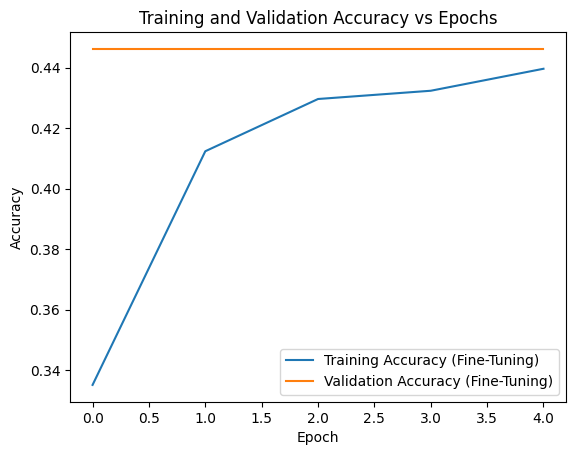

In [ ]:
# Plot training and validation accuracy vs epochs for Fine-Tuning
plt.plot(history_fine_tuning_mobilenet.history['accuracy'], label='Training Accuracy (Fine-Tuning)')
plt.plot(history_fine_tuning_mobilenet.history['val_accuracy'], label='Validation Accuracy (Fine-Tuning)')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy vs Epochs')
plt.show()

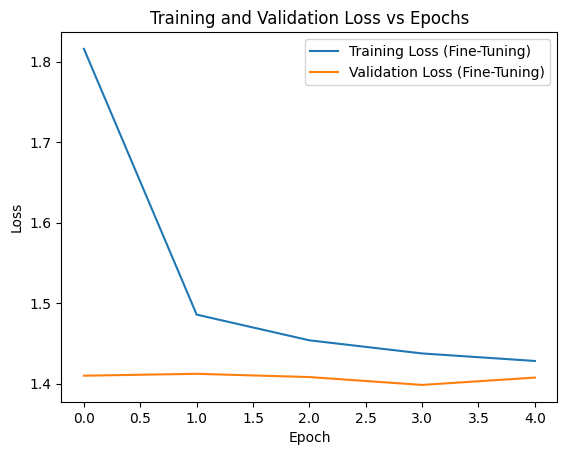

In [ ]:
# Plot training and validation loss vs epochs for Fine-Tuning
plt.plot(history_fine_tuning_mobilenet.history['loss'], label='Training Loss (Fine-Tuning)')
plt.plot(history_fine_tuning_mobilenet.history['val_loss'], label='Validation Loss (Fine-Tuning)')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss vs Epochs')
plt.show()
